In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
covid_data = pd.read_csv("C:\\projects\\covid dashboard project using streamlit\\covid_19_clean_complete.csv")

covid_data.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Costa Rica,9.748900,-83.753400,5/9/2020,780,6,480,294,Americas
1,NaN,Cote d'Ivoire,7.540000,-5.547100,5/9/2020,1667,21,769,877,Africa
2,NaN,Croatia,45.100000,15.200000,5/9/2020,2176,87,1726,363,Europe
3,NaN,Cuba,21.521757,-77.781167,5/9/2020,1754,74,1140,540,Americas
4,NaN,Cyprus,35.126400,33.429900,5/9/2020,892,15,401,476,Europe
5,NaN,Czechia,49.817500,15.473000,5/9/2020,8095,276,4447,3372,Europe
6,Faroe Islands,Denmark,61.892600,-6.911800,5/9/2020,187,0,187,0,Europe
7,Greenland,Greenland,71.706900,-42.604300,5/9/2020,11,0,11,0,Europe
8,NaN,Denmark,56.263900,9.501800,5/9/2020,10319,526,8093,1700,Europe
9,NaN,Djibouti,11.825100,42.590300,5/9/2020,1189,3,834,352,Eastern Mediterranean


In [10]:
covid_data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,2830.000000,2830.000000,2.830000e+03,2830.000000,2830.000000,2.830000e+03
mean,21.328047,22.653432,1.731214e+04,1177.208834,6032.784099,1.010215e+04
std,25.043479,70.193934,9.581076e+04,6630.579549,24365.183511,7.065969e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.540000,-19.020800,1.220000e+02,2.000000,24.000000,6.000000e+00
50%,23.424076,21.005900,6.650000e+02,11.000000,247.000000,1.860000e+02
75%,41.295600,74.766098,3.802750e+03,107.000000,1454.000000,1.495750e+03
max,71.706900,178.065000,1.535350e+06,92965.000000,289392.000000,1.152993e+06


In [11]:
covid_data_df = covid_data.dropna()

In [12]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  823 non-null    object 
 1   Country/Region  2830 non-null   object 
 2   Lat             2830 non-null   float64
 3   Long            2830 non-null   float64
 4   Date            2830 non-null   object 
 5   Confirmed       2830 non-null   int64  
 6   Deaths          2830 non-null   int64  
 7   Recovered       2830 non-null   int64  
 8   Active          2830 non-null   int64  
 9   WHO Region      2830 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 221.2+ KB


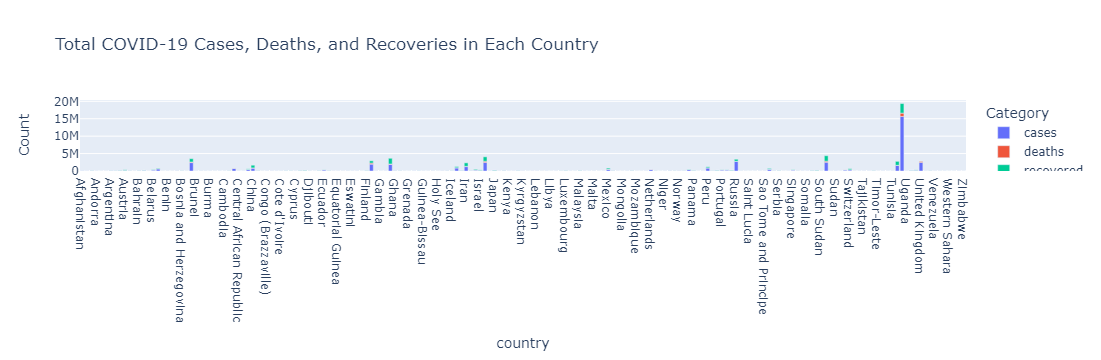

In [18]:
country_data = covid_data.groupby('country').agg({'cases':'sum', 'deaths':'sum', 'recovered':'sum'}).reset_index()

country_data_melted = country_data.melt(id_vars='country', value_vars=['cases', 'deaths', 'recovered'], 
                                         var_name='Category', value_name='Count')

fig = px.bar(country_data_melted, x='country', y='Count', color='Category', 
             title='Total COVID-19 Cases, Deaths, and Recoveries in Each Country')
fig.show()




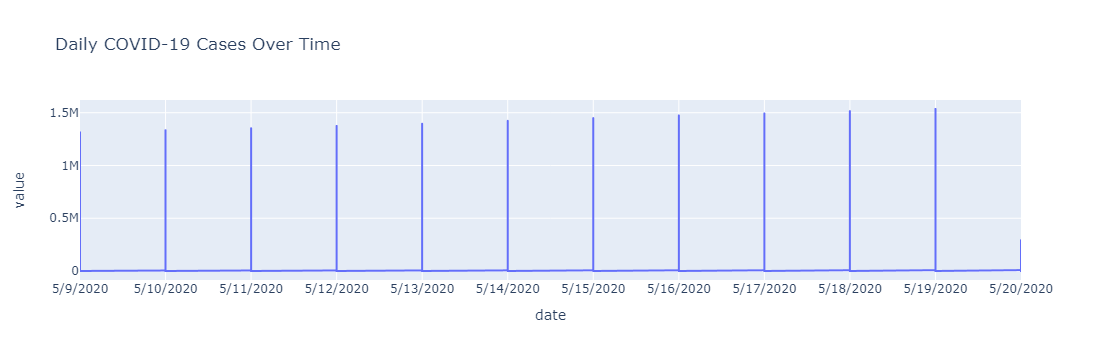

In [19]:

daily_data_melted = covid_data.melt(id_vars='date', value_vars=['cases'])

fig = px.line(daily_data_melted, x='date', y='value', 
              title='Daily COVID-19 Cases Over Time')

fig.show()


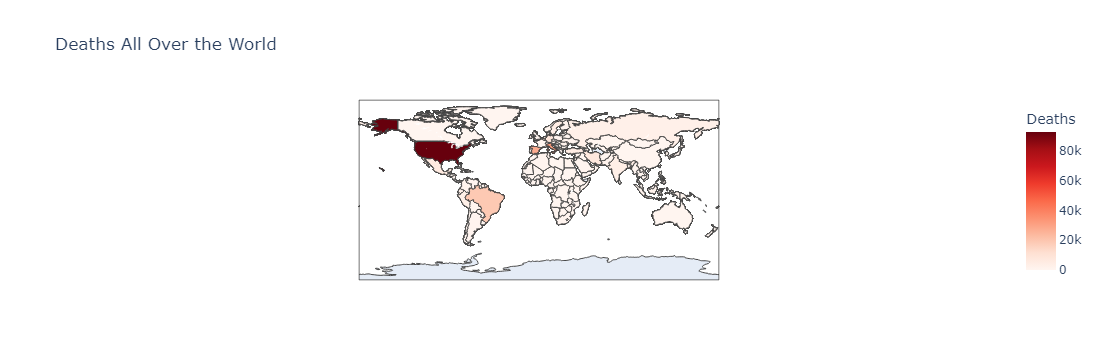

In [20]:
fig_deaths = px.choropleth(covid_data, 
                           locations='country', 
                           locationmode='country names', 
                           color='deaths', 
                           color_continuous_scale='Reds',
                           labels={'deaths': 'Deaths'},
                           title='Deaths All Over the World')
fig_deaths.show()

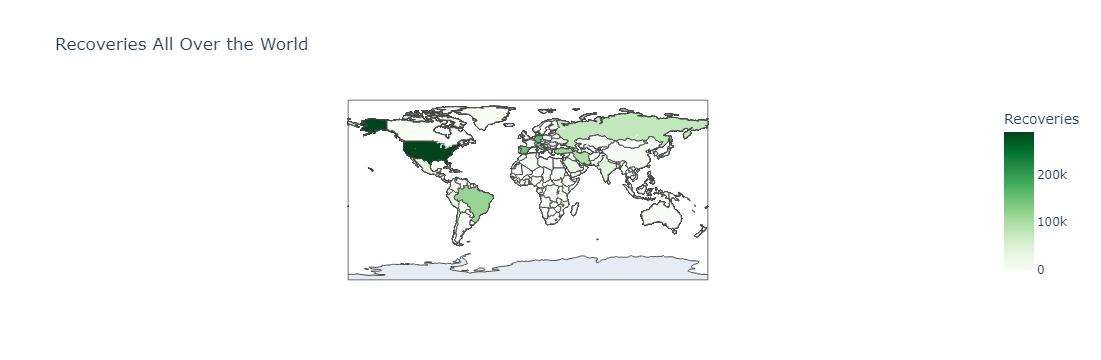

In [21]:
fig_recoveries = px.choropleth(covid_data, 
                                locations='country', 
                                locationmode='country names', 
                                color='recovered', 
                                color_continuous_scale='Greens',
                                labels={'recovered': 'Recoveries'},
                                title='Recoveries All Over the World')
fig_recoveries.show()

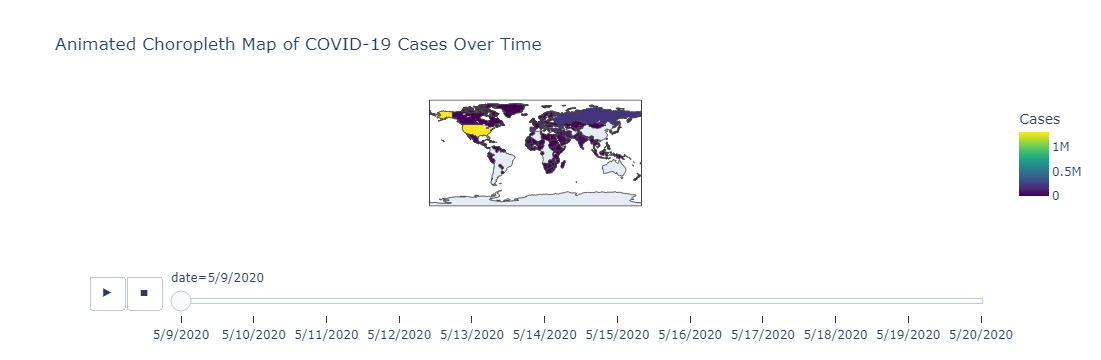

In [22]:
animated_choropleth_map = px.choropleth(covid_data, 
                                        locations='country', 
                                        locationmode='country names', 
                                        color='cases', 
                                        color_continuous_scale='Viridis',
                                        animation_frame='date',
                                        labels={'cases': 'Cases'},
                                        title='Animated Choropleth Map of COVID-19 Cases Over Time')

animated_choropleth_map.show()